## Kırmızı Şarap **Sınıflandırma**

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

# Veri Yükleme

In [77]:
df=pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [80]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


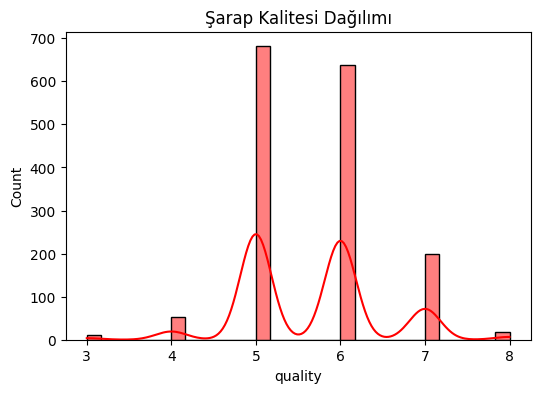

In [160]:
plt.figure(figsize=(6, 4))
sns.histplot(df['quality'], kde=True, color="r")
plt.title('Şarap Kalitesi Dağılımı')
plt.show()

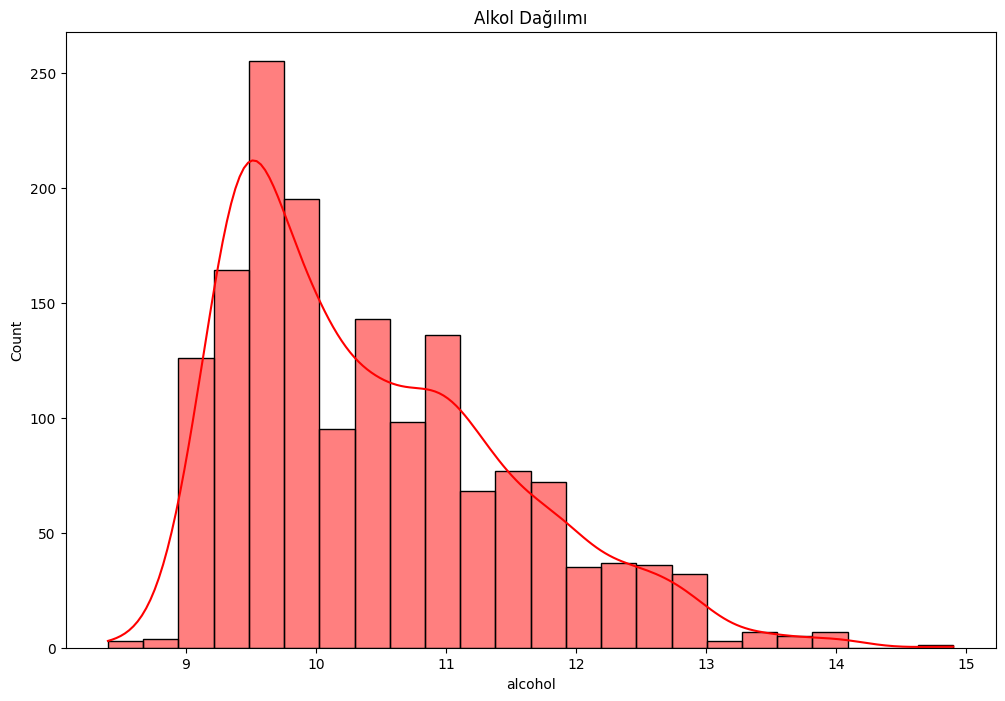

In [150]:
plt.figure(figsize=(12, 8))
sns.histplot(df['alcohol'], kde=True, color="r")
plt.title('Alkol Dağılımı')
plt.show()

In [87]:
x = df.drop('quality', axis=1)
y = df['quality']

In [88]:
# veri setini bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

KNN Algoritması

In [90]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn.score(x_test, y_test)

0.18592925775938085

In [91]:
knn.n_neighbors

5

In [92]:
knn.metric

'minkowski'

In [93]:
# model özekllikleri
dir(knn)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_valida

In [94]:
knn.predict(x_test)[0:5]

array([5.6, 5.2, 6.4, 5.6, 6.2])

In [95]:
#tahmin oluşturma
y_pred = knn.predict(x_test)

In [96]:
y_pred

array([5.6, 5.2, 6.4, 5.6, 6.2, 5.6, 5.2, 5.4, 5.4, 5.4, 6.8, 4.8, 6.2,
       6. , 5.8, 6.6, 5.4, 5.6, 6.4, 5.6, 5.2, 5.6, 6. , 6.2, 5.8, 6. ,
       5.8, 5.4, 5. , 6. , 5. , 5.2, 5. , 5.4, 5.8, 5. , 6.2, 5.6, 5.8,
       5.6, 5.8, 5. , 5.6, 5. , 5.8, 5.4, 6.4, 6. , 5. , 5.4, 5. , 5.4,
       5. , 6.4, 5. , 5.2, 6.2, 6. , 6. , 5.6, 5.6, 6.4, 5.6, 5.4, 5.6,
       5.8, 6.2, 5.4, 5.8, 5.6, 5.8, 5. , 5.8, 5.2, 6.2, 5.2, 5.2, 5.2,
       5.2, 5.4, 5.2, 6. , 6.2, 5.2, 5.8, 5.4, 5.4, 5.6, 6. , 5.2, 5.8,
       5.2, 5. , 5.4, 5. , 5.6, 5.6, 6. , 5.4, 5.4, 5.2, 5. , 5.8, 6. ,
       6. , 6. , 5.6, 5.6, 5.2, 5.2, 6.2, 5.4, 6.6, 5. , 6.4, 6. , 6. ,
       5.4, 5. , 6.4, 5.2, 5.2, 5.8, 5.2, 5.2, 5.8, 5.6, 5.6, 5.2, 6. ,
       5.8, 5.6, 5.4, 6.4, 5.4, 5.8, 5.4, 5.4, 5.6, 5.8, 6. , 5.2, 6.4,
       5.4, 5.4, 5.2, 6. , 6.4, 5.4, 5. , 5.4, 6.2, 5.6, 5.4, 5.8, 5.8,
       5.2, 6. , 5.8, 6. , 5.8, 5.6, 5.4, 5.2, 5.6, 5.6, 5.4, 5.6, 5.4,
       5. , 5.4, 5. , 6.4, 5.8, 5.6, 6. , 5.4, 5.2, 5.2, 6.2, 5.

In [97]:
# rmse
np.sqrt(mean_squared_error(y_test, y_pred))

0.7293833011524187

In [98]:
# mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.5787500000000001

#### KNN model tuning(parametre optimizasyonu)

In [100]:
# komsu sayısını 1 den 20 değişimine göre sonuçları gözlemleyelim
RMSE = []

for k in range(20):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 0.9013878188659973
k= 2 için RMSE değeri: 0.7915570099493782
k= 3 için RMSE değeri: 0.7548454587971412
k= 4 için RMSE değeri: 0.7426725388756473
k= 5 için RMSE değeri: 0.7293833011524187
k= 6 için RMSE değeri: 0.7282732622061889
k= 7 için RMSE değeri: 0.7319686203823834
k= 8 için RMSE değeri: 0.7382543811248261
k= 9 için RMSE değeri: 0.7429192502188101
k= 10 için RMSE değeri: 0.7356544705226769
k= 11 için RMSE değeri: 0.7349207243467694
k= 12 için RMSE değeri: 0.7344008565188058
k= 13 için RMSE değeri: 0.7396599850547035
k= 14 için RMSE değeri: 0.7346320924275564
k= 15 için RMSE değeri: 0.7371962651379437
k= 16 için RMSE değeri: 0.7387667880918173
k= 17 için RMSE değeri: 0.741918687660815
k= 18 için RMSE değeri: 0.7389032475630752
k= 19 için RMSE değeri: 0.7378341536057725
k= 20 için RMSE değeri: 0.7385797181076664


In [101]:
# komsu sayısını 1 den 30 değişimine göre sonuçları gözlemleyelim
MAE = []

for k in range(30):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    print("k=", k, "için MAE değeri:", mae)

k= 1 için MAE değeri: 0.59375
k= 2 için MAE değeri: 0.58125
k= 3 için MAE değeri: 0.584375
k= 4 için MAE değeri: 0.584375
k= 5 için MAE değeri: 0.5787500000000001
k= 6 için MAE değeri: 0.5802083333333334
k= 7 için MAE değeri: 0.5888392857142858
k= 8 için MAE değeri: 0.59765625
k= 9 için MAE değeri: 0.5986111111111111
k= 10 için MAE değeri: 0.5912499999999999
k= 11 için MAE değeri: 0.5911931818181818
k= 12 için MAE değeri: 0.59140625
k= 13 için MAE değeri: 0.5959134615384615
k= 14 için MAE değeri: 0.5912946428571428
k= 15 için MAE değeri: 0.5927083333333334
k= 16 için MAE değeri: 0.59375
k= 17 için MAE değeri: 0.5990808823529411
k= 18 için MAE değeri: 0.5970486111111111
k= 19 için MAE değeri: 0.5958881578947368
k= 20 için MAE değeri: 0.595625
k= 21 için MAE değeri: 0.6007440476190476
k= 22 için MAE değeri: 0.5994318181818181
k= 23 için MAE değeri: 0.5974184782608696
k= 24 için MAE değeri: 0.5970052083333333
k= 25 için MAE değeri: 0.59825
k= 26 için MAE değeri: 0.6018028846153846
k= 27 i

In [102]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [103]:
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(x_train, y_train)

In [104]:
knn_cv_model.best_params_

{'n_neighbors': 22}

In [105]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(x_train, y_train)

In [106]:
y_pred = knn_tuned.predict(x_test)

In [107]:
# mae
mean_absolute_error(y_test,y_pred)

0.5994318181818181

## Destek Vektör Regresyonu (Support Vector Regression)

In [108]:
svr = SVR().fit(x_train, y_train)

In [109]:
svr

SVR()

In [155]:
svr.predict(x_train)[0:30]

array([5.46425227, 5.30777363, 5.85991185, 5.81979727, 5.31656073,
       4.9703001 , 6.06922378, 5.52228726, 4.85766693, 5.78988017,
       5.98048405, 6.05379324, 5.1051769 , 5.41344666, 5.79725024,
       6.0146428 , 5.78679077, 5.91738827, 5.34490389, 5.07455995,
       6.00986877, 6.16539351, 5.7665351 , 5.44361525, 5.89979332,
       5.51313141, 6.04114361, 5.60713555, 5.6971654 , 5.79518353])

In [156]:
svr.predict(x_test)[0:30]

array([5.41263822, 5.07723242, 5.88358605, 5.74207652, 5.79200952,
       5.52472431, 5.09789303, 5.71466534, 5.60779105, 5.86498041,
       6.07711367, 5.68478452, 5.67298584, 5.66482402, 5.50573446,
       6.10368909, 5.15739438, 5.45424983, 6.0070087 , 5.26405537,
       5.82070394, 5.48050498, 5.9141938 , 6.03895034, 5.72263604,
       5.60182649, 5.95938702, 5.40570088, 5.16225975, 5.78988017])

In [112]:
#rmse
y_pred = svr.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.7297267161479509

In [113]:
svr_params = {"C": [0.1,2.5,2,3]}

In [114]:
svr_cv_model = GridSearchCV(svr, svr_params, cv = 10).fit(x_train, y_train)

In [115]:
svr_cv_model.best_params_

{'C': 3}

In [116]:
svr_cv_model = GridSearchCV(svr, svr_params, cv = 10, verbose = 2, n_jobs = -1).fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [117]:
svr_cv_model.best_params_

{'C': 3}

In [118]:
svr_tuned = SVR( C =3).fit(x_train, y_train)

In [119]:
y_pred = svr_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6990577537109307

# Rastgele Orman

In [120]:
rf_model = RandomForestRegressor(random_state = 42).fit(x_train, y_train)

In [121]:
rf_model

RandomForestRegressor(random_state=42)

In [122]:
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5488516420673258

In [123]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [20, 50, 100, 200],
            "min_samples_split": [2,10,80,100]}

In [124]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [125]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [126]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(x_train, y_train)

In [127]:
y_pred = rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5797099409108194

## Karar Ağacı (Decision Tree)

In [128]:
dt = DecisionTreeRegressor()

In [129]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [130]:
dt.predict(x_test)[0:10]

array([6., 5., 5., 5., 6., 5., 5., 5., 7., 6.])

In [131]:
y_pred = dt.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7603453162872774

In [132]:
dt = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = dt.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7885905147793751

In [133]:
dt_params = {"max_depth": [1,3,4,5,10,20],
              "min_samples_split": [2,10,5,50,40,20]}

In [134]:
dt = DecisionTreeRegressor()
dt_cv_model = GridSearchCV(dt, dt_params, cv = 10).fit(x_train, y_train)

In [135]:
dt_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [136]:
dt_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(x_train, y_train)

In [137]:
y_pred = dt_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6612520453798649

# Değişken Önem Düzeyi

In [142]:
rf_tuned.feature_importances_*1000

array([ 58.54045192, 126.06212373,  67.22933879,  51.83674021,
        69.30161431,  43.55486173,  79.1873882 ,  85.01462852,
        52.77495931, 153.59132239, 212.90657088])

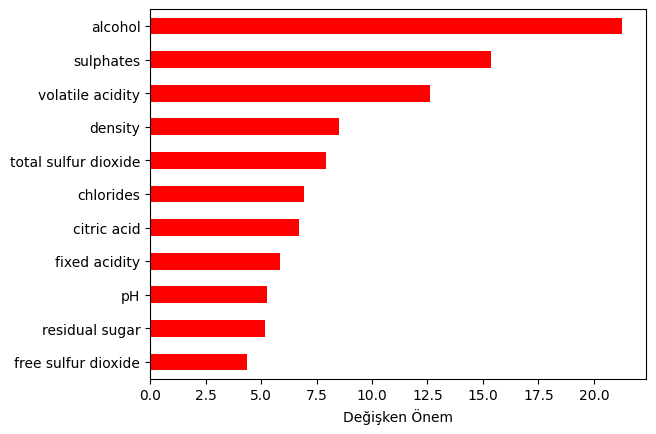

In [144]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                          index = x_train.columns)


Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Değişken Önem')
plt.gca().legend_ = None